# Extract data from MindBody Completed Class Account Page for Analysis

### Objective
1. Harvest the workout class activitiy from my account page on Mindbody.com
2. Use BeautifulSoup to extract the interesting data.
3. Write to the data do a csv for reporting and analysis. 

**Challenges**
- Mindbody is behind authentication
- The HTML is not well structured

Author - Rod Morrison

In [17]:
import pandas as pd
from bs4 import BeautifulSoup

Ingest the file


In [18]:
mhtml_file= 'data/Mindbody.htm'

with open(mhtml_file, 'r', encoding='utf-8') as f:
    html = f.read()
    
soup = BeautifulSoup(html, 'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<!-- saved from url=(0055)https://www.mindbodyonline.com/explore/account/schedule -->
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="A/kargTFyk8MR5ueravczef/wIlTkbVk1qXQesp39nV+xNECPdLBVeYffxrM8TmZT6RArWGQVCJ0LRivD7glcAUAAACQeyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IkRpc2FibGVUaGlyZFBhcnR5U3RvcmFnZVBhcnRpdGlvbmluZzIiLCJleHBpcnkiOjE3NDIzNDIzOTksImlzU3ViZG9tYWluIjp0cnVlLCJpc1RoaXJkUGFydHkiOnRydWV9" http-equiv="origin-trial"/>
  <script src="./full_Account _ Mindbody_files/169e250927" type="text/javascript">
  </script>
  <script src="./full_Account _ Mindbody_files/nr-spa-1208.min.js">
  </script>
  <script async="" charset="utf-8" crossorigin="anonymous" integrity="sha384-8mJgBUBw4uTWF9Ooxgb4sUuO9jKtaVm1I+8vb0qpxxX3cafec7ovH+goM3yD4UyO" src="./full_Account _ Mindbody_files/recaptcha__en.js" type="text/javascript">
  </script>
  <script async="" src="./full_Account _ Mindbody_files/mixpan

In [20]:
clean_mb = soup.prettify()

with open('data/clean_mb.html', 'w', encoding='utf-8') as f:
    f.write(clean_mb)


Ingest the cleaned data

In [21]:
with open('data/clean_mb.html', 'r', encoding='utf-8') as f:
    html = f.read()
    
soup = BeautifulSoup(html, 'html.parser')
print(soup.title)


<title>
   Account | Mindbody
  </title>


Write File to CSV

### EDA and Data Prep

---

#### Key Challenges
1. **Inconsistent Data Structure**:
   - Elements like dates and times may be missing or structured differently, leading to misalignment in the extracted data.
   - This caused my data from being consistent in the dataframe. 
2. **Dynamic Content**:
   - If the HTML contains JavaScript-rendered content, static parsing may miss certain elements.
3. **Data Alignment**:
   - Extracted lists for different attributes (e.g., dates, categories) have mismatched lengths.

---

## Solution

### Step 1: Identify the Parent Container
- The workout schedule data is encapsulated in containers identified by the class `UserScheduleItem_wrapper__8PXfi`.
- Each container holds all relevant data (e.g., dates, times, categories, locations).

### Step 2: Iterative Parsing
- Iterate through each container and extract the following:
  - **Date (`day`)**: Extracted from `UserScheduleItemDate_day__1DJZ_`.
  - **Month and Year (`month_year`)**: Extracted from `UserScheduleItemDate_month__1Vlt2`.
  - **Category (`category`)**: Extracted from `CategoryTag_category__3BsVp`.
  - **Class Name (`class_name`)**: Extracted from `UserScheduleItemDetails_headerLink__1UVuC`.
  - **Location (`location`)**: Extracted from `UserScheduleItemDetails_link__u4Ftd`.
  - **Start Time (`time_of_day`)**: Extracted from `UserScheduleItemTime_start__1M87Z`.
  - **Duration (`duration`)**: Extracted from `UserScheduleItemTime_end__2Ykw-`.

### Step 3: Handle Missing Data Gracefully
- Use `.find()` and conditional checks to avoid errors for missing elements.
- Append `None` for any missing data to maintain alignment.

### Step 4: Create a DataFrame
- Compile the extracted data into a Pandas DataFrame for easy manipulation and analysis.
- Ensure alignment across all attributes by processing each container independently.

### Step 5: Save to CSV
- Save the final DataFrame to a CSV file for further analysis or reporting.

---



In [111]:
# Load the cleaned HTML file
html_file_path = "data/clean_mb.html"  # Replace with the correct file path

with open(html_file_path, "r", encoding="utf-8") as file:
    html_data = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_data, "html.parser")

# Extract all 'UserScheduleItem_wrapper__8PXfi' containers
schedule_items = soup.find_all('div', class_='UserScheduleItem_wrapper__8PXfi')

# Parse data from each schedule item container
parsed_data = []
for item in schedule_items:
    day = item.find('div', class_='UserScheduleItemDate_day__1DJZ_')
    month_year = item.find('div', class_='UserScheduleItemDate_month__1Vlt2')
    category = item.find('span', class_='CategoryTag_category__3BsVp')
    class_name = item.find('span', class_='UserScheduleItemDetails_headerLink__1UVuC')
    location = item.find('span', class_='UserScheduleItemDetails_link__u4Ftd')
    time_of_day = item.find('h5', class_='UserScheduleItemTime_start__1M87Z')
    duration = item.find('div', class_='UserScheduleItemTime_end__2Ykw-')
    
    # Add parsed data to the list
    parsed_data.append({
        'day': day.get_text(strip=True) if day else None,
        'month_year': month_year.get_text(strip=True) if month_year else None,
        'category': category.get_text(strip=True) if category else None,
        'class_name': class_name.get_text(strip=True) if class_name else None,
        'location': location.get_text(strip=True) if location else None,
        'time_of_day': time_of_day.get_text(strip=True) if time_of_day else None,
        'duration': duration.get_text(strip=True) if duration else None,
    })

# Convert the parsed data to a DataFrame
df = pd.DataFrame(parsed_data)

# Save the DataFrame to a CSV file
output_file_path = "data/workout_schedule.csv"  # Replace with the desired output path
df.to_csv(output_file_path, index=False)

print(f"Cleaned workout schedule data saved to: {output_file_path}")


Cleaned workout schedule data saved to: data/workout_schedule.csv


In [112]:
df.describe()
df.head()

day     month_year      category            class_name  \
0  13  January, 2025  Martial arts      Fighting Mastery   
1  13  January, 2025  Martial arts  Fighting Foundations   
2  11  January, 2025  Martial arts              Sparring   
3  08  January, 2025  Martial arts      Fighting Mastery   
4  08  January, 2025  Martial arts  Fighting Foundations   

                                  location time_of_day  duration  
0  Cantu's Self-Defense, LLC. w/ Roy Cantu     12:30pm  (30 min)  
1  Cantu's Self-Defense, LLC. w/ Roy Cantu     11:30am  (60 min)  
2  Cantu's Self-Defense, LLC. w/ Roy Cantu     11:00am  (60 min)  
3  Cantu's Self-Defense, LLC. w/ Roy Cantu     12:30pm  (30 min)  
4  Cantu's Self-Defense, LLC. w/ Roy Cantu     11:30am  (60 min)

In [115]:
# Split the month_year column into separate month and year columns
df[['month', 'year']] = df['month_year'].str.split(', ', expand=True)

# Strip leading and trailing whitespaces from month and year columns
df['month'] = df['month'].str.strip()
df['year'] = df['year'].str.strip()

# Strip the parentheses from the duration column
df['duration'] = df['duration'].str.strip('()')

# Convert the day column to numeric
df['day'] = pd.to_numeric(df['day'], errors='coerce')

# Convert the time_of_day column to datetime
df['time_of_day'] = pd.to_datetime(df['time_of_day'], format='%I:%M %p', errors='coerce')

# Convert the duration column to timedelta
df['duration'] = pd.to_timedelta(df['duration'])

# Save the DataFrame to a CSV file
output_file_path = "data/workout_history.csv"  # Replace with the desired output path
df.to_csv(output_file_path, index=False)

print(f"Updated DataFrame saved to {output_file_path}")

Updated DataFrame saved to data/workout_history.csv


In [116]:
df.head()

day     month_year      category            class_name  \
0   13  January, 2025  Martial arts      Fighting Mastery   
1   13  January, 2025  Martial arts  Fighting Foundations   
2   11  January, 2025  Martial arts              Sparring   
3    8  January, 2025  Martial arts      Fighting Mastery   
4    8  January, 2025  Martial arts  Fighting Foundations   

                                  location time_of_day        duration  \
0  Cantu's Self-Defense, LLC. w/ Roy Cantu         NaT 0 days 00:30:00   
1  Cantu's Self-Defense, LLC. w/ Roy Cantu         NaT 0 days 01:00:00   
2  Cantu's Self-Defense, LLC. w/ Roy Cantu         NaT 0 days 01:00:00   
3  Cantu's Self-Defense, LLC. w/ Roy Cantu         NaT 0 days 00:30:00   
4  Cantu's Self-Defense, LLC. w/ Roy Cantu         NaT 0 days 01:00:00   

     month  year  
0  January  2025  
1  January  2025  
2  January  2025  
3  January  2025  
4  January  2025

In [117]:
# Check for any NaT values in the time_of_day column
nat_times = df[df['time_of_day'].isna()]
print("\nRows with NaT in 'time_of_day':")
print(nat_times)


Rows with NaT in 'time_of_day':
      day      month_year      category            class_name  \
0      13   January, 2025  Martial arts      Fighting Mastery   
1      13   January, 2025  Martial arts  Fighting Foundations   
2      11   January, 2025  Martial arts              Sparring   
3       8   January, 2025  Martial arts      Fighting Mastery   
4       8   January, 2025  Martial arts  Fighting Foundations   
...   ...             ...           ...                   ...   
1233   11   January, 2017         Other    Adult Fundamentals   
1234    9   January, 2017         Other    Adult Fundamentals   
1235    7   January, 2017         Other            Adult Spar   
1236    4   January, 2017         Other    Adult Fundamentals   
1237   17  December, 2016         Other            Adult Spar   

                                     location time_of_day        duration  \
0     Cantu's Self-Defense, LLC. w/ Roy Cantu         NaT 0 days 00:30:00   
1     Cantu's Self-Defense, LLC.

In [118]:
df.isna().sum()

day               0
month_year        0
category          0
class_name       25
location          0
time_of_day    1238
duration          0
month             0
year              0
dtype: int64

In [120]:
# Fill missing values in the class_name column
df['class_name'] = df['class_name'].fillna('Unknown')

# Convert time_of_day to string and fill missing values
df['time_of_day'] = df['time_of_day'].astype(str).replace('NaT', 'Unknown')

In [121]:
df.isna().sum()

day            0
month_year     0
category       0
class_name     0
location       0
time_of_day    0
duration       0
month          0
year           0
dtype: int64

In [123]:
# Drop the month_year column
df.drop(columns=['month_year'], inplace=True)

# Rearrange the columns to have day, month, and year as the first three columns
columns_order = ['day', 'month', 'year', 'category', 'class_name', 'location', 'time_of_day', 'duration']
df = df[columns_order]

# Save the updated DataFrame to a new CSV file
output_file_path = "/Users/rmorrison/Projects/Notebooks/Workouts/data/workout_history_updated.csv"
df.to_csv(output_file_path, index=False)

print(f"Updated DataFrame saved to {output_file_path}")

Updated DataFrame saved to /Users/rmorrison/Projects/Notebooks/Workouts/data/workout_history_updated.csv


In [125]:
df

day     month  year      category            class_name  \
0      13   January  2025  Martial arts      Fighting Mastery   
1      13   January  2025  Martial arts  Fighting Foundations   
2      11   January  2025  Martial arts              Sparring   
3       8   January  2025  Martial arts      Fighting Mastery   
4       8   January  2025  Martial arts  Fighting Foundations   
...   ...       ...   ...           ...                   ...   
1233   11   January  2017         Other    Adult Fundamentals   
1234    9   January  2017         Other    Adult Fundamentals   
1235    7   January  2017         Other            Adult Spar   
1236    4   January  2017         Other    Adult Fundamentals   
1237   17  December  2016         Other            Adult Spar   

                                     location time_of_day        duration  
0     Cantu's Self-Defense, LLC. w/ Roy Cantu     Unknown 0 days 00:30:00  
1     Cantu's Self-Defense, LLC. w/ Roy Cantu     Unknown 0 days 01:00:00  
2     Cantu's Self-Defense, LLC. w/ Roy Cantu     Unknown 0 days 01:00:00  
3     Cantu's Self-Defense, LLC. w/ Roy Cantu     Unknown 0 days 00:30:00  
4     Cantu's Self-Defense, LLC. w/ Roy Cantu     Unknown 0 days 01:00:00  
...                                       ...         ...             ...  
1233  Cantu's Self-Defense, LLC. w/ Roy Cantu     Unknown 0 days 01:00:00  
1234  Cantu's Self-Defense, LLC. w/ Roy Cantu     Unknown 0 days 01:00:00  
1235  Cantu's Self-Defense, LLC. w/ Roy Cantu     Unknown 0 days 01:00:00  
1236  Cantu's Self-Defense, LLC. w/ Roy Cantu     Unknown 0 days 01:00:00  
1237  Cantu's Self-Defense, LLC. w/ Roy Cantu     Unknown 0 days 01:00:00  

[1238 rows x 8 columns]

**Reporting**

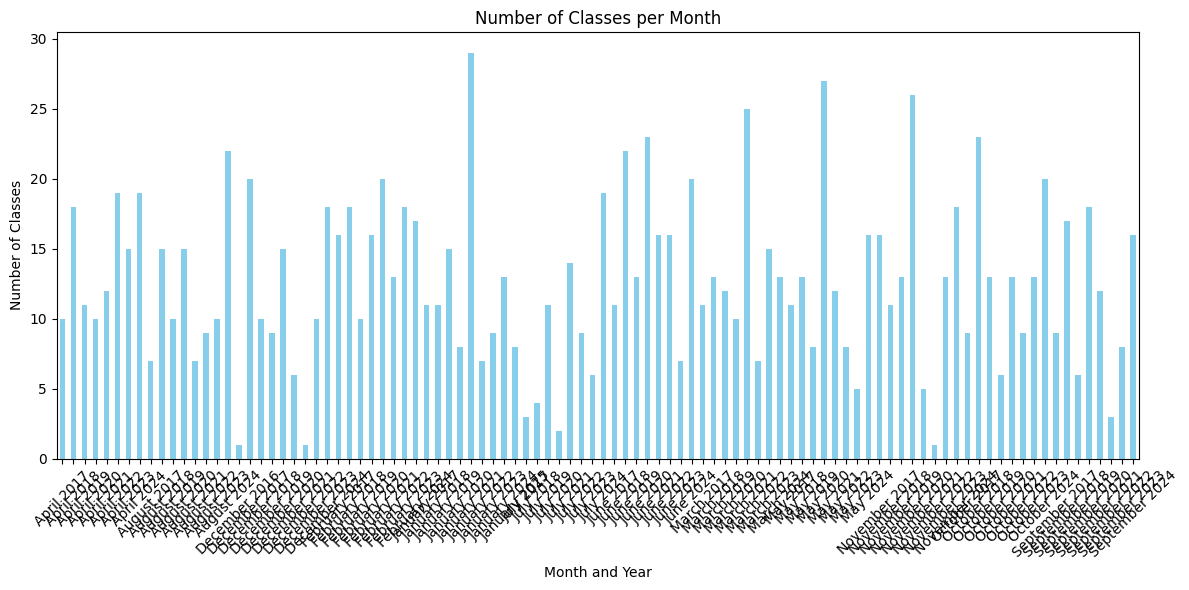

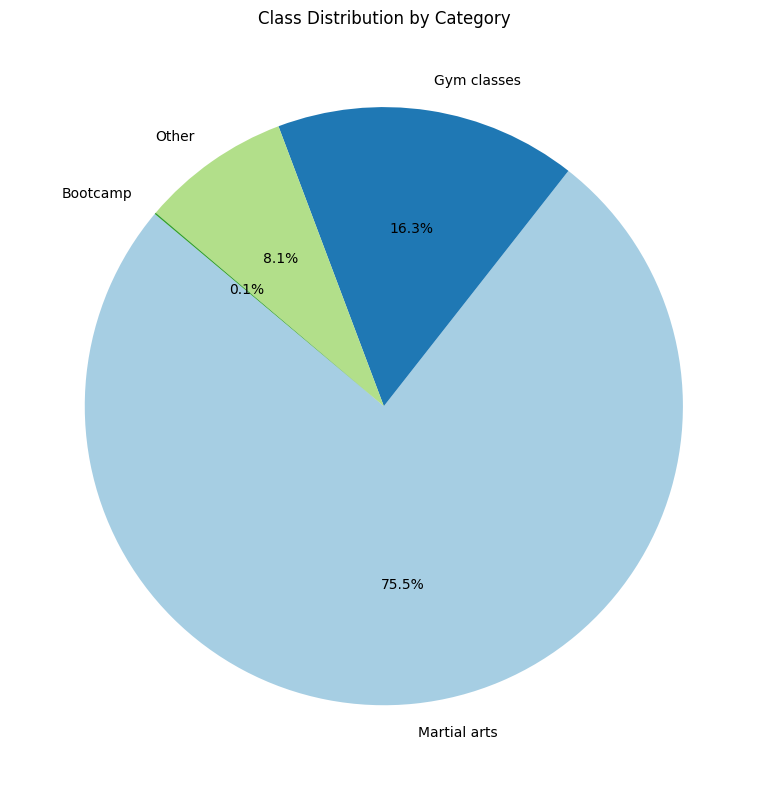

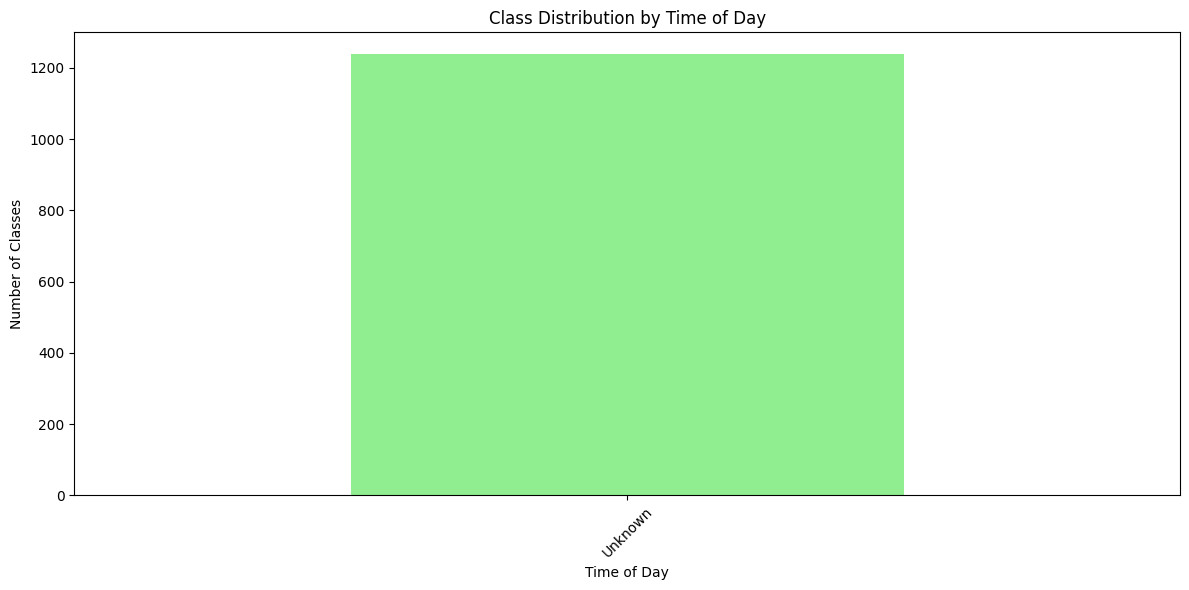

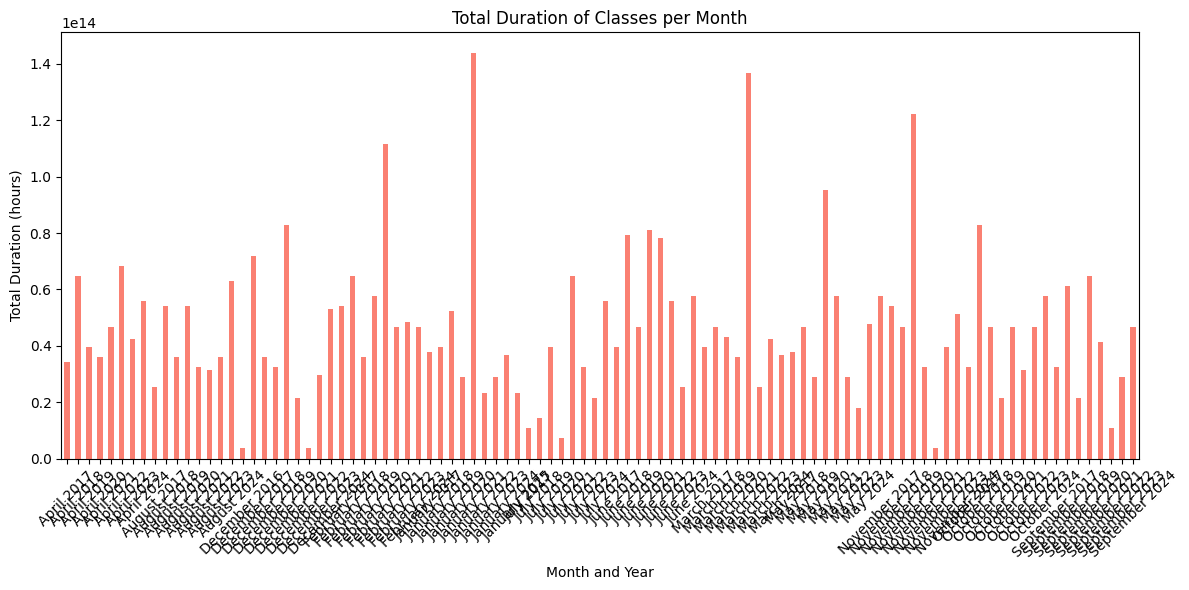

In [126]:
import matplotlib.pyplot as plt

# Combine month and year into a single column for grouping
df['month_year'] = df['month'] + ' ' + df['year']

# Convert duration to timedelta
df['duration'] = pd.to_timedelta(df['duration'])

# Number of Classes per Month
class_counts = df.groupby('month_year').size()
class_counts = class_counts.sort_index()

plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Classes per Month')
plt.xlabel('Month and Year')
plt.ylabel('Number of Classes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('classes_per_month.png')
plt.show()

# Class Distribution by Category
category_counts = df['category'].value_counts()

plt.figure(figsize=(8, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Class Distribution by Category')
plt.ylabel('')
plt.tight_layout()
plt.savefig('class_distribution_by_category.png')
plt.show()

# Class Distribution by Time of Day
time_counts = df['time_of_day'].value_counts()

plt.figure(figsize=(12, 6))
time_counts.plot(kind='bar', color='lightgreen')
plt.title('Class Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Classes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('class_distribution_by_time_of_day.png')
plt.show()

# Total Duration of Classes per Month
duration_per_month = df.groupby('month_year')['duration'].sum()
duration_per_month = duration_per_month.sort_index()

plt.figure(figsize=(12, 6))
duration_per_month.plot(kind='bar', color='salmon')
plt.title('Total Duration of Classes per Month')
plt.xlabel('Month and Year')
plt.ylabel('Total Duration (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_duration_per_month.png')
plt.show()



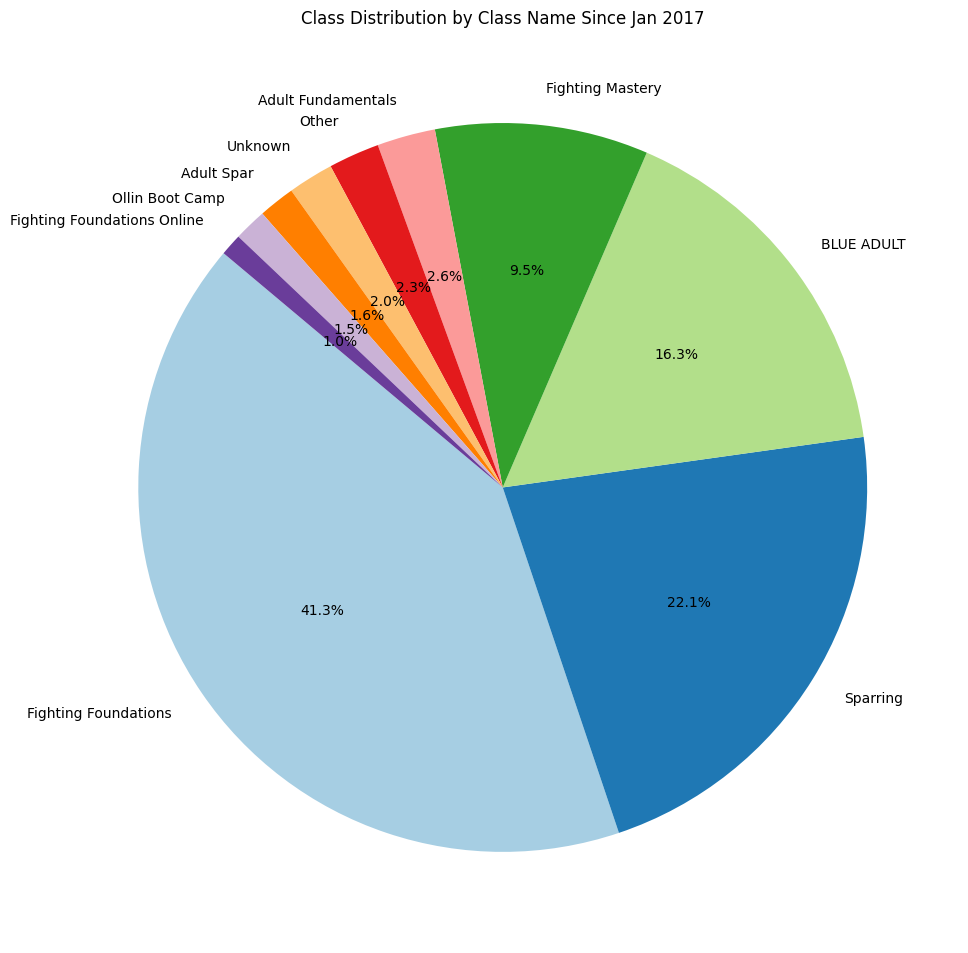

In [130]:
# Class Distribution by Class Name
class_name_counts = df['class_name'].value_counts()

# Aggregate smaller categories into 'Other'
threshold = 10  # Set a threshold for the minimum number of occurrences
other_class_names = class_name_counts[class_name_counts < threshold].index
df['class_name'] = df['class_name'].apply(lambda x: 'Other' if x in other_class_names else x)

# Recalculate class_name_counts after aggregation
class_name_counts = df['class_name'].value_counts()

plt.figure(figsize=(10, 10))
class_name_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Class Distribution by Class Name Since Jan 2017')
plt.ylabel('')
plt.tight_layout()
plt.savefig('class_distribution_by_class_name.png')
plt.show()